In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
# Parameters
max_words = 20000  # Maximum number of words to consider in the tokenizer
max_sequence_length = 200  # Maximum length of input sequences
embedding_dim = 100  # Embedding dimension for the word vectors
batch_size = 64
epochs = 20

# Load Dataset
train_df_cleaned = pd.read_csv(r'\Users\Greesma\Desktop\NLP\train_cleaned.csv', encoding='ISO-8859-1', low_memory=False)
test_df_cleaned = pd.read_csv(r'\Users\Greesma\Desktop\NLP\test_cleaned.csv')

In [3]:
# Step 1: Data Preparation
texts = train_df_cleaned['crimeaditionalinfo'].astype(str).values
labels = train_df_cleaned['sub_category'].astype(str).values

In [4]:
# Step 2: Label Encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)
labels_encoded = to_categorical(labels_encoded)  # One-hot encode the labels

In [5]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

In [6]:
X = pad_sequences(sequences, maxlen=max_sequence_length)
y = labels_encoded

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
embedding_matrix = np.zeros((max_words, embedding_dim))

In [11]:
model = Sequential([
    Embedding(input_dim=max_words, 
              output_dim=embedding_dim, 
              input_length=max_sequence_length, 
              weights=[embedding_matrix] if embedding_matrix.any() else None,
              trainable=False),  # Use pre-trained embeddings, make trainable if custom embeddings are needed
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)),  # Adjust dropout
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.2)),
    Dense(128, activation='relu'),
    Dropout(0.4),  # Dropout to prevent overfitting
    Dense(y.shape[1], activation='softmax')  # Adjust num_classes for your dataset
])

In [12]:
# Compile Model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),  # Optimizer with learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Callbacks for Training
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [15]:
# Train Model
history = model.fit(
    X_train, y_train,  # Replace with preprocessed train data
    validation_split=0.2,
    epochs=epochs,
    batch_size=batch_size,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 519s 588ms/step - accuracy: 0.3021 - loss: 2.3629 - val_accuracy: 0.3315 - val_loss: 2.0455
Epoch 2/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 565s 649ms/step - accuracy: 0.3257 - loss: 2.0786 - val_accuracy: 0.3361 - val_loss: 2.0125
Epoch 3/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 588s 675ms/step - accuracy: 0.3329 - loss: 2.0374 - val_accuracy: 0.3194 - val_loss: 2.0240
Epoch 4/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 581s 668ms/step - accuracy: 0.3492 - loss: 1.9979 - val_accuracy: 0.4042 - val_loss: 1.8710
Epoch 5/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 598s 686ms/step - accuracy: 0.3948 - loss: 1.9118 - val_accuracy: 0.4141 - val_loss: 1.8186
Epoch 6/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 503s 578ms/step - accuracy: 0.4105 - loss: 1.8539 - val_accuracy: 0.4280 - val_loss: 1.7802
Epoch 7/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 508s 583ms/step - accuracy: 0.4269 - loss: 1.8092 - val_accuracy: 0.4495 - val_loss: 1.7355
Epoch 8/20
871/871 ━━━━━━━━━━━━━━━━━━━━ 530s 547ms/step - accuracy: 0.4371 -

In [16]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

545/545 ━━━━━━━━━━━━━━━━━━━━ 51s 94ms/step - accuracy: 0.5222 - loss: 1.5091
Test Loss: 1.5188724994659424
Test Accuracy: 0.5211599469184875


In [19]:
train_loss, train_accuracy = model.evaluate(X_train, y_train)
print(f"Train Loss: {train_loss}")
print(f"Train Accuracy: {train_accuracy}")

2177/2177 ━━━━━━━━━━━━━━━━━━━━ 208s 95ms/step - accuracy: 0.5213 - loss: 1.4975
Train Loss: 1.505097508430481
Train Accuracy: 0.520334780216217


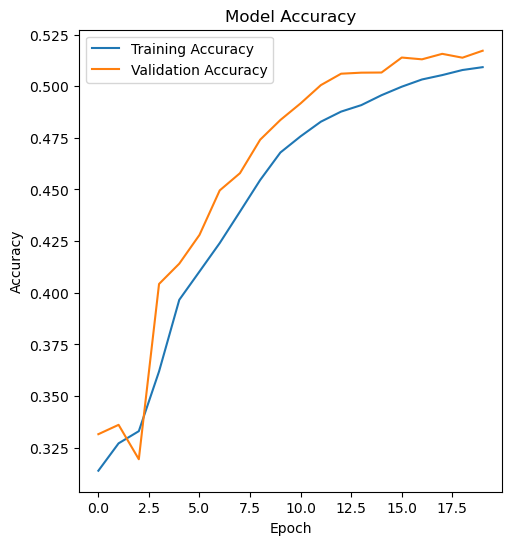

In [17]:
import re
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Training and Validation Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

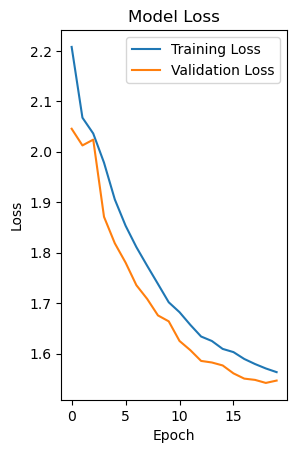

In [18]:
# Plot Training and Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()